Populating the interactive namespace from numpy and matplotlib


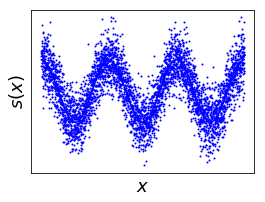

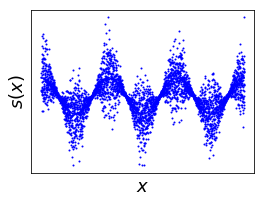

In [2]:
%pylab inline
import numpy as np

figsize(4,3)

import os
cwd = os.getcwd()
dir_name = os.path.join(cwd, 'other', 'noise-bunch')
file_ext = '.png'
if not os.path.exists(dir_name):
    os.makedirs(dir_name)

font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 15}
matplotlib.rc('font', **font)

N = 4000
T = 1
omega = 2.0*np.pi/T

t = np.linspace(0, 3*T, N)

def get_sn(A_n=0.5):
    sig = np.cos(omega*t)
    noise = A_n*np.random.normal(size=N)
    s_n = sig + noise
    return sig, noise, s_n

sig, noise, s_n = get_sn()

plot(t/T, s_n, 'bo', markersize=1.0, lw=0.5)
plot(t/T, sig, 'b')

xlabel(r'$x$', fontsize=18)
ylabel(r'$s(x)$', fontsize=18)

xticks([])
yticks([])

savefig(os.path.join(dir_name, 'sig+noise'+file_ext), bbox_inches='tight', pad_inches=0.5)

show()


def get_snb(A_n=0.5):
    sig = np.cos(omega*t)
    noise = A_n*np.random.normal(size=N)
    noise_bunched = 2*noise*sig**2
    s_n_b = sig + 0.1*noise + noise_bunched
    return sig, noise, s_n_b

sig, noise, s_n_b = get_snb()

plot(t/T, s_n_b, 'bo', markersize=1.0, lw=0.5)
plot(t/T, sig, 'b')

xlabel(r'$x$', fontsize=18)
ylabel(r'$s(x)$', fontsize=18)

xticks([])
yticks([])

savefig(os.path.join(dir_name, 'sig+noise-bunched'+file_ext), bbox_inches='tight', pad_inches=0.5)

show()



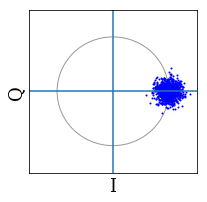

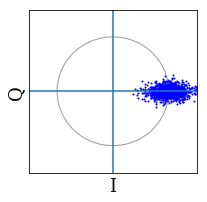

In [3]:
## IQ

figsize(3,3)

N_IQ = 1000
I, Q = np.zeros(N_IQ), np.zeros(N_IQ)
for i in range(N_IQ):
    sig, noise, s_n = get_sn(A_n=5.0)
    I[i] = 2*np.sum(s_n*np.cos(omega*t))/N
    Q[i] = 2*np.sum(s_n*np.sin(omega*t))/N
    
plot(I, Q, 'bo', markersize=1)
xlim([-1.5, 1.5])
ylim([-1.5, 1.5])

xlabel(r'I', fontsize=18)
ylabel(r'Q', fontsize=18)

xticks([])
yticks([])

axvline(x=0)
axhline(y=0)
grid()
circle = Circle((0, 0), 1.0, color='k', fill=False, alpha=0.4)
gca().add_artist(circle)

savefig(os.path.join(dir_name, 'sig+noise-IQ'+file_ext), bbox_inches='tight', pad_inches=0.5)

show()


N_IQ = 1000
I, Q = np.zeros(N_IQ), np.zeros(N_IQ)
for i in range(N_IQ):
    sig, noise, s_n = get_snb(A_n=5.0)
    I[i] = 2*np.sum(s_n*np.cos(omega*t))/N
    Q[i] = 2*np.sum(s_n*np.sin(omega*t))/N
    
plot(I, Q, 'bo', markersize=1)
xlim([-1.5, 1.5])
ylim([-1.5, 1.5])

xlabel(r'I', fontsize=18)
ylabel(r'Q', fontsize=18)

xticks([])
yticks([])

axvline(x=0)
axhline(y=0)
grid()
circle = Circle((0, 0), 1.0, color='k', fill=False, alpha=0.4)
gca().add_artist(circle)

savefig(os.path.join(dir_name, 'sig+noise-bunched-IQ'+file_ext), bbox_inches='tight', pad_inches=0.5)

show()


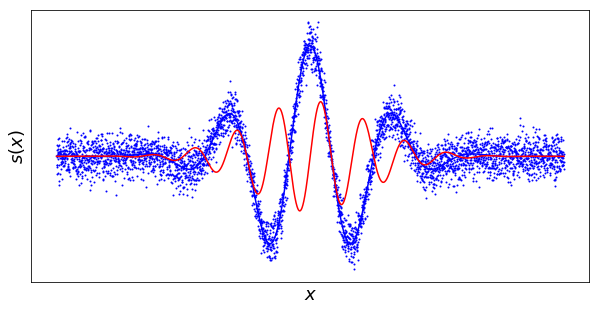

In [4]:
## ST

figsize(10,5)

N = 4000
X = T
k = 2.0*np.pi/X
x = np.linspace(-3*X, 3*X, N)

sig = np.exp(-x**2)*np.cos(k*x)
noise = 0.1*np.random.normal(size=N)
s_n = sig + noise
med = 0.5*np.exp(-x**2)*np.sin(2*k*x)

plot(x, s_n, 'bo', markersize=1)
plot(x, sig, 'b', markersize=1)
plot(x, med, 'r')

xlabel(r'$x$', fontsize=18)
ylabel(r'$s(x)$', fontsize=18)

xticks([])
yticks([])

savefig(os.path.join(dir_name, 'ST-sig+noise'+file_ext), bbox_inches='tight', pad_inches=0.5)

show()